In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("C:/Niveda/Projects/Mini project/kdd_dataset/kddcup99_csv.csv")

In [3]:
# check target
df["label"].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [4]:
# check missing data
print('Number of missing values in the training dataset:',sum(df.isnull().sum()))

Number of missing values in the training dataset: 0


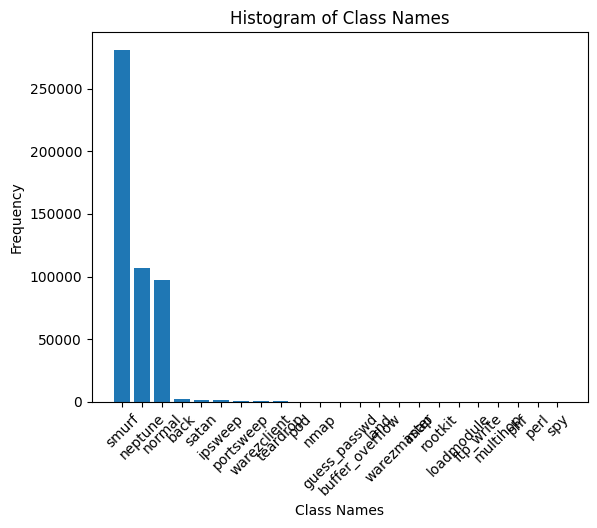

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the column you want to plot is named 'column_name'

# Get the value counts of the column
value_counts = df['label'].value_counts()

# Plot the histogram
plt.bar(value_counts.index, value_counts)

# Set labels and title
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Histogram of Class Names')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [6]:
df.drop('label',axis=1).columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [7]:
#percentage of each label
per_label=(df["label"].value_counts()/len(df["label"])*100)
per_label

smurf              56.837780
neptune            21.699729
normal             19.690903
back                0.445933
satan               0.321647
ipsweep             0.252419
portsweep           0.210518
warezclient         0.206469
teardrop            0.198170
pod                 0.053439
nmap                0.046759
guess_passwd        0.010728
buffer_overflow     0.006073
land                0.004251
warezmaster         0.004048
imap                0.002429
rootkit             0.002024
loadmodule          0.001822
ftp_write           0.001619
multihop            0.001417
phf                 0.000810
perl                0.000607
spy                 0.000405
Name: label, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

sub_to_main_category = {
    'normal': 'normal',
    'buffer_overflow': 'R2L',
    'loadmodule': 'R2L',
    'perl': 'R2L',
    'neptune': 'DOS',
    'smurf': 'DOS',
    'guess_passwd': 'U2R',
    'pod': 'DOS',
    'teardrop': 'DOS',
    'portsweep': 'PRB',
    'ipsweep': 'PRB',
    'land': 'DOS',
    'ftp_write': 'U2R',
    'back': 'DOS',
    'imap': 'U2R',
    'satan': 'PRB',
    'phf': 'U2R',
    'nmap': 'PRB',
    'multihop': 'R2L',
    'warezmaster': 'U2R',
    'warezclient': 'U2R',
    'spy': 'U2R',
    'rootkit': 'R2L'
}
# Map subcategories to categories
df['category'] = df['label'].map(sub_to_main_category)
df.drop('label', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [11]:
# Count the number of records in each category
category_counts = df['category'].value_counts()

# Display the counts
print(category_counts)

DOS       391458
normal     97277
PRB         4107
U2R         1119
R2L           59
Name: category, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
encoding_mapping = {}  # dictionary to store encoding mapping

for col in ['protocol_type', 'service', 'flag', 'category']:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
    encoding_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Drop the original categorical columns
df_numeric = df.drop(['protocol_type', 'service', 'flag', 'category'], axis=1)

# Print encoding mapping
for col, mapping in encoding_mapping.items():
    print(f"Encoding mapping for column '{col}':")
    print(mapping)
    print()

Encoding mapping for column 'protocol_type':
{'icmp': 0, 'tcp': 1, 'udp': 2}

Encoding mapping for column 'service':
{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'imap4': 24, 'iso_tsap': 25, 'klogin': 26, 'kshell': 27, 'ldap': 28, 'link': 29, 'login': 30, 'mtp': 31, 'name': 32, 'netbios_dgm': 33, 'netbios_ns': 34, 'netbios_ssn': 35, 'netstat': 36, 'nnsp': 37, 'nntp': 38, 'ntp_u': 39, 'other': 40, 'pm_dump': 41, 'pop_2': 42, 'pop_3': 43, 'printer': 44, 'private': 45, 'red_i': 46, 'remote_job': 47, 'rje': 48, 'shell': 49, 'smtp': 50, 'sql_net': 51, 'ssh': 52, 'sunrpc': 53, 'supdup': 54, 'systat': 55, 'telnet': 56, 'tftp_u': 57, 'tim_i': 58, 'time': 59, 'urh_i': 60, 'urp_i': 61, 'uucp': 62, 'uucp_path': 63, 'vmnet': 64, 'whoi

In [13]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in ['protocol_type', 'service', 'flag', 'category']:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop the original categorical columns
df_numeric = df.drop(['protocol_type', 'service', 'flag', 'category'], axis=1)


In [14]:
# Count the number of records in each category
category_counts = df_numeric['category_encoded'].value_counts()

# Display the counts
print(category_counts)

0    391458
4     97277
1      4107
3      1119
2        59
Name: category_encoded, dtype: int64


In [15]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   src_bytes                    494020 non-null  int64  
 2   dst_bytes                    494020 non-null  int64  
 3   land                         494020 non-null  int64  
 4   wrong_fragment               494020 non-null  int64  
 5   urgent                       494020 non-null  int64  
 6   hot                          494020 non-null  int64  
 7   num_failed_logins            494020 non-null  int64  
 8   logged_in                    494020 non-null  int64  
 9   lnum_compromised             494020 non-null  int64  
 10  lroot_shell                  494020 non-null  int64  
 11  lsu_attempted                494020 non-null  int64  
 12  lnum_root                    494020 non-null  int64  
 13 

In [16]:
df_numeric.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
       'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
       'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type_encoded', 'service_encoded',
       'flag_encoded', 'category_encoded'],
      dtype='object')

# Feature extraction

In [6]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

y = df_numeric['category_encoded']
df_numeric.drop('category_encoded', axis=1, inplace=True)
# Step 2: Normalize the data
# Step 2: Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df_numeric.values)  # Corrected

# Step 3: Grid Initialization
# Define the SOM grid shape based on the number of features (41)
# Let's choose a square grid for simplicity, adjusting the size as needed
grid_size = int(np.ceil(np.sqrt(41)))  # Adjust as needed
som_shape = (grid_size, grid_size)

# Initialize SOM
som = MiniSom(som_shape[0], som_shape[1], 41, sigma=1.0, learning_rate=0.5)  # 41 features

# Step 4: Train SOM
som.train_random(X, 1000)  # You can adjust the number of iterations based on your dataset size

# Step 5: Output Representation and Mapping
# Each neuron in the SOM grid represents a lower-dimensional feature vector
# Map each data point to its corresponding neuron in the SOM grid
mapped = som.win_map(X)

In [7]:
# Step 6: Compute the correlation matrix
# Concatenate all mapped data into a single array
mapped_concatenated = np.concatenate(list(mapped.values()), axis=0)
# Convert the concatenated mapped data into a DataFrame
df_mapped = pd.DataFrame(mapped_concatenated)
# Calculate the correlation matrix
df_mapped

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.11,0.0,0.0,0.0,0.0,0.0,0.5,0.338462,0.9
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.5,0.338462,0.9
2,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.5,0.338462,0.9
3,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.5,0.338462,0.9
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.02,0.0,0.0,0.0,0.0,0.0,0.5,0.338462,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.0,0.0,0.0,1.0,1.0,0.5,0.692308,0.1
494016,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.0,0.0,0.0,1.0,1.0,0.5,0.692308,0.1
494017,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.0,0.0,0.0,1.0,1.0,0.5,0.692308,0.1
494018,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.0,0.0,0.0,1.0,1.0,0.5,0.692308,0.1


# Feature selection

In [9]:
correlation_matrix = df_mapped.corr()#.abs()
print(correlation_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.004258  0.005440 -0.000452 -0.003235  0.003786  0.013213   
1   0.004258  1.000000 -0.000002 -0.000020 -0.000139 -0.000005  0.004483   
2   0.005440 -0.000002  1.000000 -0.000175 -0.001254  0.016288  0.004365   
3  -0.000452 -0.000020 -0.000175  1.000000 -0.000318 -0.000017 -0.000295   
4  -0.003235 -0.000139 -0.001254 -0.000318  1.000000 -0.000123 -0.002106   
5   0.003786 -0.000005  0.016288 -0.000017 -0.000123  1.000000  0.000356   
6   0.013213  0.004483  0.004365 -0.000295 -0.002106  0.000356  1.000000   
7   0.005239 -0.000027  0.049330 -0.000065 -0.000467  0.141996  0.008740   
8  -0.017265  0.001701  0.047814 -0.002784 -0.019908  0.006164  0.105306   
9   0.058095  0.000119  0.023298 -0.000038 -0.000271  0.014285  0.007348   
10  0.021340 -0.000022  0.031680 -0.000070 -0.000504  0.034790  0.024065   
11  0.055853 -0.000010  0.075656 -0.000031 -0.000223 -0.000012 -0.000206   
12  0.056766

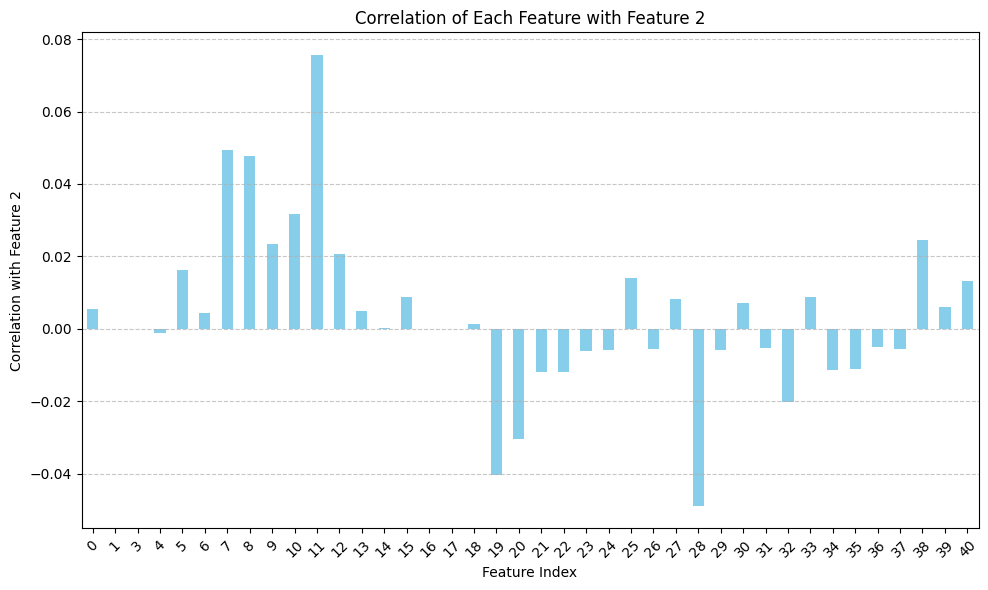

In [10]:
import matplotlib.pyplot as plt

# Extract correlations of feature 2 with other features
correlation_with_feature_2 = correlation_matrix.iloc[2, :].drop(2)  # Exclude correlation with itself

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_with_feature_2.plot(kind='bar', color='skyblue')
plt.xlabel('Feature Index')
plt.ylabel('Correlation with Feature 2')
plt.title('Correlation of Each Feature with Feature 2')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
correlation_matrix = df_mapped.corr().abs()
print(correlation_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.004258  0.005440  0.000452  0.003235  0.003786  0.013213   
1   0.004258  1.000000  0.000002  0.000020  0.000139  0.000005  0.004483   
2   0.005440  0.000002  1.000000  0.000175  0.001254  0.016288  0.004365   
3   0.000452  0.000020  0.000175  1.000000  0.000318  0.000017  0.000295   
4   0.003235  0.000139  0.001254  0.000318  1.000000  0.000123  0.002106   
5   0.003786  0.000005  0.016288  0.000017  0.000123  1.000000  0.000356   
6   0.013213  0.004483  0.004365  0.000295  0.002106  0.000356  1.000000   
7   0.005239  0.000027  0.049330  0.000065  0.000467  0.141996  0.008740   
8   0.017265  0.001701  0.047814  0.002784  0.019908  0.006164  0.105306   
9   0.058095  0.000119  0.023298  0.000038  0.000271  0.014285  0.007348   
10  0.021340  0.000022  0.031680  0.000070  0.000504  0.034790  0.024065   
11  0.055853  0.000010  0.075656  0.000031  0.000223  0.000012  0.000206   
12  0.056766

In [12]:
rejected_features = []
selected_features=[x for x in range(41)]
# Iterate through each feature
for feature in correlation_matrix.columns:
    if feature not in rejected_features:
        #find the features which have coef >0.5 with the current feature
        correlated_features = correlation_matrix[feature][correlation_matrix[feature] > 0.5].index.tolist()
        if feature in correlated_features:
            correlated_features.remove(feature)
        print(f"For feature {feature}: {correlated_features}")
        if correlated_features:
            max_correlated_feature = max(correlated_features, key=lambda x: correlation_matrix.loc[feature, x])
            if max_correlated_feature in selected_features:
                selected_features.remove(max_correlated_feature)
                rejected_features.append(max_correlated_feature)
# Display the selected features
print("Selected features after feature selection:")
print(selected_features)
print("Rejected features after feature selection:")
print(rejected_features)

For feature 0: []
For feature 1: []
For feature 2: []
For feature 3: []
For feature 4: []
For feature 5: []
For feature 6: [18]
For feature 7: []
For feature 8: [19, 28]
For feature 9: [11, 12]
For feature 10: []
For feature 11: [9, 12]
For feature 13: []
For feature 14: []
For feature 15: []
For feature 16: []
For feature 17: []
For feature 20: [19, 21, 22, 25, 29, 30, 32, 34, 35, 38, 39, 40]
For feature 21: [20, 22, 25, 29, 30, 32, 34, 35, 39, 40]
For feature 22: [20, 21, 25, 29, 30, 32, 34, 35, 39, 40]
For feature 23: [24, 36, 37, 40]
For feature 25: [20, 21, 22, 29, 30, 32, 34, 35, 38, 39, 40]
For feature 26: [31]
For feature 27: []
For feature 28: [8, 19]
For feature 29: [19, 20, 21, 22, 25, 30, 32, 34, 35, 38, 39, 40]
For feature 33: []
For feature 36: [23, 24, 37, 40]
For feature 37: [23, 24, 36, 40]
For feature 38: [19, 20, 25, 29, 30, 32, 39]
For feature 39: [19, 20, 21, 22, 25, 29, 30, 32, 34, 35, 38, 40]
For feature 40: [20, 21, 22, 23, 24, 25, 29, 30, 32, 34, 35, 36, 37, 39

In [13]:
len(rejected_features)

14

In [14]:
len(selected_features)

27

In [15]:
df_pearson=df_mapped[selected_features]
df_pearson

,0,1,2,3,4,5,6,7,10,11,...,26,27,28,29,33,36,37,38,39,40
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.035294,0.035294,0.0,0.0,0.0,0.5,0.338462,0.9
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.074510,0.074510,0.0,0.0,0.0,0.5,0.338462,0.9
2,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.113725,0.113725,0.0,0.0,0.0,0.5,0.338462,0.9
3,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.152941,0.152941,0.0,0.0,0.0,0.5,0.338462,0.9
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.192157,0.192157,0.0,0.0,0.0,0.5,0.338462,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.0,1.000000,0.031373,0.0,1.0,1.0,0.5,0.692308,0.1
494016,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.0,1.000000,0.043137,0.0,1.0,1.0,0.5,0.692308,0.1
494017,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.0,1.000000,0.074510,0.0,1.0,1.0,0.5,0.692308,0.1
494018,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.0,1.000000,0.074510,0.0,1.0,1.0,0.5,0.692308,0.1


In [16]:
from sklearn.feature_selection import mutual_info_classif

# Assuming your dataframe is named 'df' and the target variable is named 'target'

# Calculate mutual information between each feature and the target
mi_values = mutual_info_classif(df_pearson, y)

# Threshold for feature selection
threshold = 0.00001

# Selecting features based on the threshold
selected_features = [df_pearson.columns[i] for i, mi in enumerate(mi_values) if mi > threshold]
rejected_features = [df_pearson.columns[i] for i, mi in enumerate(mi_values) if mi <= threshold]

# Print selected and rejected features
print("Selected features:")
print(selected_features)
print()
print("Rejected features:")
print(rejected_features)

Selected features:
[0, 1, 2, 3, 4, 6, 7, 10, 13, 17, 21, 22, 26, 27, 28, 29, 33, 36, 37, 38, 39, 40]

Rejected features:
[5, 11, 14, 15, 16]


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def joint_entropy(x, y):
  # Use pandas.crosstab to create a contingency table
  xy_counts = pd.crosstab(x, y).values.ravel()
  xy_prob = xy_counts / np.sum(xy_counts)

  # Handle potential zero probabilities
  xy_prob[xy_prob == 0] = np.finfo(float).eps  # Replace with a small value

  entropy = np.sum(xy_prob[xy_prob > 0] * np.log2(xy_prob[xy_prob > 0]))
  return entropy

def entropy(x):
  x_prob = x.value_counts(normalize=True)

  # Handle potential zero probabilities
  x_prob[x_prob == 0] = np.finfo(float).eps

  entropy = np.sum(x_prob[x_prob > 0] * np.log2(x_prob[x_prob > 0]))
  return entropy

def mutual_info(x, y):
  return joint_entropy(x, y) - (entropy(x) + entropy(y))

# Define threshold for MI
threshold = 0.00001  # Adjust if needed

# Feature selection with MI
selected_features_mi = []
rejected_features_mi=[]
for i in range(len(selected_features)):
  feature_mi = mutual_info(df_pearson.iloc[:, i], y)
  print(f"For feature {selected_features[i]}: {feature_mi}")

  # Remove the check for 'i in selected_features' as it's not defined
  if feature_mi > threshold:
    selected_features_mi.append(selected_features[i])
  else:
    rejected_features_mi.append(selected_features[i])

print("Selected features based on MI:")
print(selected_features_mi)
print("Rejected features based on MI:")
print(rejected_features_mi)


For feature 0: 0.0246640135907914
For feature 1: 0.19104094398535487
For feature 2: 0.18255769500152974
For feature 3: 4.23630417392129e-05
For feature 4: 0.0018826218115088889
For feature 6: 2.7182173608641946e-06
For feature 7: 0.0006991033613207298
For feature 10: 3.217881519057553e-05
For feature 13: 2.3995705381585353e-06
For feature 17: 5.133689852443446e-06
For feature 21: 0.0003917666663481034
For feature 22: 4.3703214887891306e-05
For feature 26: 0.00011895161124209075
For feature 27: 0.0
For feature 28: 0.0
For feature 29: 0.0021911919649282297
For feature 33: 0.0027172137735400614
For feature 36: 0.007650082724525387
For feature 37: 0.04992838306598224
For feature 38: 0.1450820590081947
For feature 39: 0.045183170997802335
For feature 40: 0.14235162365939558
Selected features based on MI:
[0, 1, 2, 3, 4, 7, 10, 21, 22, 26, 29, 33, 36, 37, 38, 39, 40]
Rejected features based on MI:
[6, 13, 17, 27, 28]


In [18]:
len(selected_features_mi)

17

In [19]:
len(rejected_features_mi)

5

In [20]:
selected_features_mi=[0,1,2,3,4,6,7,10,13,14,15,21,22,26,27,28,29,33,36,37,38,39,40]

In [21]:
len(selected_features_mi)

23

In [22]:
X_selected=df_mapped[selected_features_mi]

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
predictions = mlp.predict(X_train)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already performed feature selection with MI
# and have the variables df_mapped, y, and selected_features_mi
X_train, X_test, y_train, y_test = train_test_split(df_mapped[selected_features_mi], y, test_size=0.2, random_state=42)

# Define and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=10)  # Adjust parameters as needed
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [23]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8880106068580219


In [25]:
# Perform 10-fold cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')  # Replace 'accuracy' with desired metric

# Print the mean and standard deviation of the scores
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88759 (+/- 0.00204)


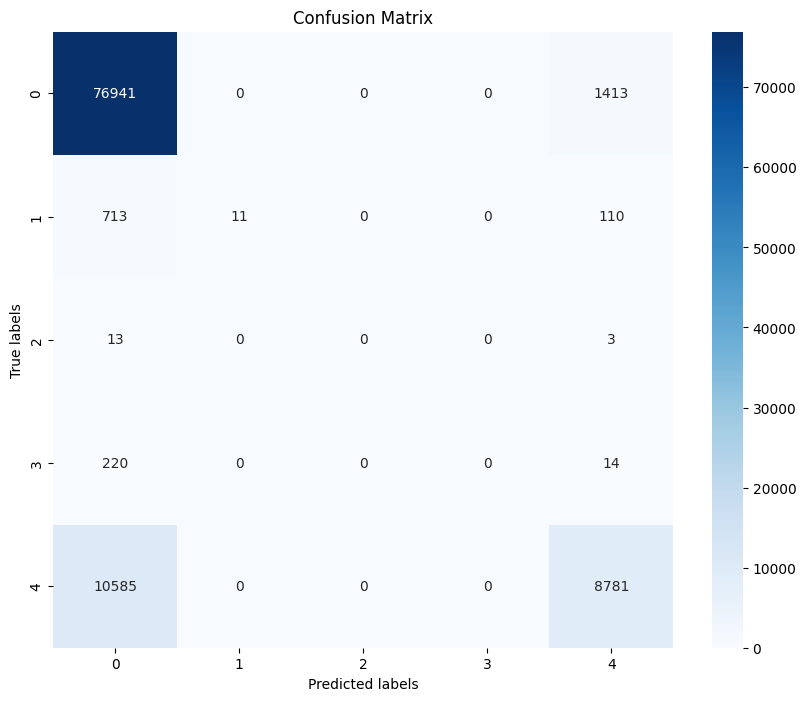

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('confusion.png')
plt.show()


In [45]:
X_selected=df_mapped[selected_features_mi]

# Model Creation,Training and testing

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define and train the MLP classifier
input_size = len(selected_features_mi)  # Number of input features
output_size = len(np.unique(y))  # Number of output classes
middle_layer_size = (input_size + output_size) // 2  # Starting point for hidden layer size

mlp = MLPClassifier(hidden_layer_sizes=(middle_layer_size,),
                    activation='logistic',  # Adjust activation for multi-class problems if needed
                    solver='sgd',  # Adjust solver (e.g., 'adam')
                    alpha=0.0001,  # Adjust learning rate
                    batch_size='auto',
                    learning_rate='adaptive',  # Consider using adaptive learning rate
                    learning_rate_init=0.001,
                    max_iter=1000,
                    shuffle=True,
                    tol=0.0001,
                    verbose=False,  # Set to True for training progress updates
                    warm_start=False,
                    momentum=0.9,  # Adjust momentum if needed
                    nesterovs_momentum=True,
                    early_stopping=True,  # Enable early stopping
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-08,
                    n_iter_no_change=10)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(14,), learning_rate='adaptive', max_iter=1000,
              solver='sgd')

In [48]:
from sklearn.metrics import accuracy_score
y_pred_mlp_1 = mlp.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_mlp_1)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8495303833852881


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     78354
           1       0.00      0.00      0.00       834
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00       234
           4       0.66      0.34      0.45     19366

    accuracy                           0.83     98804
   macro avg       0.30      0.26      0.27     98804
weighted avg       0.80      0.83      0.80     98804



C:\Users\nived\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nived\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nived\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

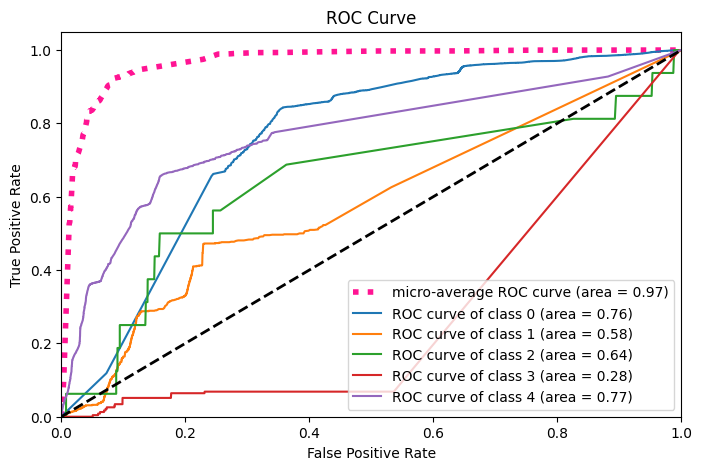

In [58]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer

# Fit the classifier
mlp.fit(X_train, y_train)

# Predict probabilities for each class
y_prob = mlp.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = len(mlp.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Binarize the labels
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_prob, average='micro')

# Classification report
y_pred = mlp.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 5))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (area = {:.2f})'
                                   ''.format(mlp.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Place legend with class names
plt.legend(loc="lower right")
plt.savefig('roc_mlp.png')
plt.show()


In [33]:
# Perform 10-fold cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(mlp, X_train, y_train, cv=10, scoring='accuracy')  # Replace 'accuracy' with desired metric

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.00)
